In [1]:
import sys
import json
import warnings

import numpy as np
import pandas as pd
import scanpy as sc
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('../..')
from scanpy import AnnData
from itertools import chain
from matplotlib.colors import LinearSegmentedColormap
from utils import UnimapResult, set_plot_theme, generate_positions


set_plot_theme()
warnings.filterwarnings('ignore')

In [2]:
s_data = sc.read_h5ad('../../data/mg/mg_ref.h5ad')
t_data = sc.read_h5ad('../../data/mg/mg_query.h5ad')

s_data.obs['domain'] = 'source'
t_data.obs['domain'] = 'target'
raw_data = sc.concat([s_data, t_data], join='outer')
sc.tl.pca(raw_data, svd_solver='arpack')
sc.pp.neighbors(raw_data, n_neighbors=10, n_pcs=40)
sc.tl.umap(raw_data)

result = UnimapResult('mg', f'unimap/2023', root_dir='../../results', detailed=False)

color_dict = json.load(open('../../color_dict.json'))
batch_c = color_dict["mg_batch"]
ct_c = color_dict["mg_ct_query"]
pd_ct_c = color_dict["mg_ct_ref"]

ref_ct_l = result.s_result['celltype']
ct_w_l = result.s_result['pred_celltype_prob'].rank(method='dense', ascending=True)
query_ct_l = ['reference'] * len(result.s_result) + list(result.t_result['celltype'])
query_pd_ct_l = ['reference'] * len(result.s_result) + list(result.t_result['pred_celltype'])


pd_ct_c = {'reference': '#E0E0E0', 'Macrophage': '#d6616b', 'aa CD8 T cell (I)': '#fd8d3c', 'DP T cell': '#aec7e8', 'DN T cell': '#9e9ac8', 'Monocyte (CD14)': '#e7969c', 'aa CD8 T cell (II)': '#5254a3', 'Thymic memory B cell': '#8ca252', 'Cycling DN/DP T cell': '#bd9e39', 'CD4 Tcm (Th0)': '#d9d9d9', 'CD8 Tnaive': '#a55194', 'Thymic CD4 T cell (II)': '#9ecae1', 'Naive B cell': '#fdae6b', 'mTEC (I)': '#a1d99b', 'NK cell': '#bcbddc', 'CD4 Tnaive': '#74c476', 'CD4 Tem (Th1/17)': '#ffa500', 'Memory B cell (II)': '#b5cf6b', 'Pre GC B cell': '#e7ba52', 'Plasmablast': '#6baed6', 'CD4 Tcm (Tfh)': '#ce6dbd', 'gd T cell': '#c6dbef', 'CD4 Temra (Th1)': '#fdd0a2', 'CD4 Tcm (Th2)': '#de9ed6', 'Thymic CD4 T cell (I)': '#dadaeb', 'Unswitched memory B cell': '#e6550d', 'Memory B cell (I)': '#9c9ede', 'CD4 Tcm (Th17)': '#8c6d31', 'Naive Treg': '#e7cb94', 'CD8 Temra': '#a2c8ec', 'cDC1': '#c7e9c0', 'CD4 Tem (Th1)': '#3182bd', 'T agonist': '#ad494a', 'GC B cell': '#636363', 'Thymic CD8 T cell': '#756bb1', 'NKT cell (periphery)': '#31a354', 'pDC': '#393b79', 'cDC2': '#637939', 'mTEC (II)': '#cedb9c', 'NKT cell (thymus)': '#b6d957', 'CD8 Tem': '#7b4173', 'CD8 Trm': '#ff0000', 'Normal fibroblast': '#ff6d00', 'cTEC': '#6b6ecf', 'ILC': '#ffc000', 'Activated Treg': '#ffe100', 'Monocyte (CD16)': '#843c39', 'Endothelial cell': '#a7e3a7', 'Tumor associated fibroblast': '#7cbc5e', 'nmTEC': '#389c90'}

ct_c = {"reference": "#E0E0E0", "Age-associated B cells": "#e6550d", "Naive B cells": "#fdae6b", "Memory B cells": "#9c9ede", "Plasma cells": "#6baed6", "Classical monocytes": "#e7969c",   "Non-classical monocytes": "#843c39", "Neutrophils": "#a55194", "Megakaryocytes/platelets": "#fdae6b", "Neutrophil-myeloid progenitor": "#c49c94", "CD16+ NK cells": "#bcbddc", "Tem/Temra cytotoxic T cells": "#a2c8ec",   "MAIT cells": "#ffa500", "Tem/Trm cytotoxic T cells": "#7b4173", "Tem/Effector helper T cells": "#de9ed6", "Tcm/Naive helper T cells": "#74c476", "Tcm/Naive cytotoxic T cells": "#a55194", "Regulatory T cells": "#8c6d31", "DC2": "#637939", "HSC/MPP": "#9e9ac8", "Late erythroid": "#ce6dbd"
    }

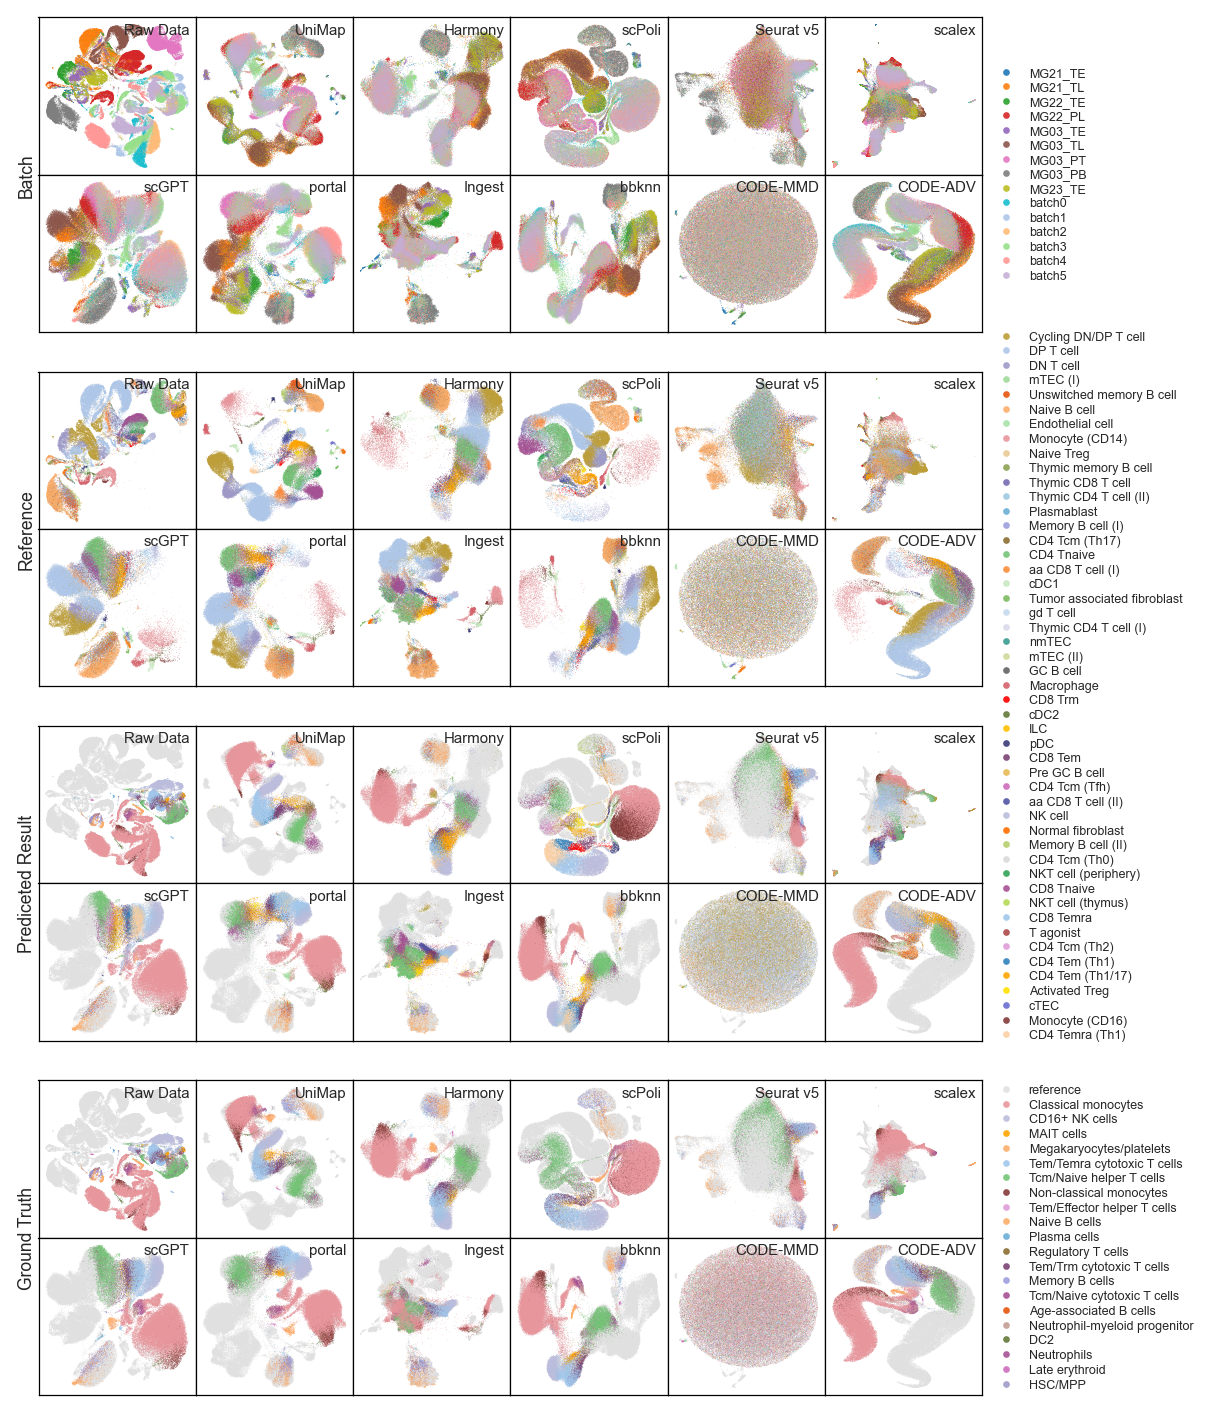

In [3]:
fig, axs = plt.subplots(figsize=(185 / 25.4, 250 / 25.4))
axs.remove()


models = ['raw_data', 'unimap', 'harmony', 'scpoli', 'seurat',  'scalex', 'scgpt', 'portal', 'ingest', 'bbknn', 'code_mmd', 'code_adv']
models_name =  ['Raw Data', 'UniMap', 'Harmony', 'scPoli', 'Seurat v5', 'scalex', 'scGPT', 'portal', 'Ingest', 'bbknn', 'CODE-MMD', 'CODE-ADV']

position1 = generate_positions(w=0.12, h=0.12 / (250/185), l=0.06, b=0.8)
position2 = generate_positions(w=0.12, h=0.12 / (250/185), l=0.06, b=0.6)
position3 = generate_positions(w=0.12, h=0.12 / (250/185), l=0.06, b=0.4)
position4 = generate_positions(w=0.12, h=0.12 / (250/185), l=0.06, b=0.2)

for idx, model in enumerate(models):
    model_name = models_name[idx]
    if model == 'raw_data':
        umap1 = raw_data.obsm['X_umap'][:, 0]
        umap2 = raw_data.obsm['X_umap'][:, 1]

        batch_labels = raw_data.obs.batch
        ref_labels = ['reference'] * sum(raw_data.obs['domain']  ==  'source')
        ct_labels = list(raw_data[raw_data.obs.domain == 'source'].obs.celltype)
        pd_ct_labels = ref_labels + list(raw_data[raw_data.obs.domain == 'target'].obs.celltype)
        ground_truth = ref_labels + list(raw_data[raw_data.obs.domain == 'target'].obs.celltype)
    else:
        result = UnimapResult('mg', f'{model}/2023', root_dir='../../results', detailed=False)
        umap1 = result.st_umap_result['umap1']
        umap2 = result.st_umap_result['umap2']

        batch_labels = list(result.st_result.batch)
        ref_labels = ['reference'] * len(result.s_result['domain'])
        ct_labels = list(result.s_result.celltype)
        pd_ct_labels = ref_labels + list(result.t_result.pred_celltype)
        ground_truth = ref_labels + list(result.t_result.celltype)
    

    ax1 = fig.add_axes(position1[idx])
    ax2 = fig.add_axes(position2[idx])
    ax3 = fig.add_axes(position3[idx])
    ax4 = fig.add_axes(position4[idx])
    
    s = 0.05
    p1 = sns.scatterplot(x=umap1, y=umap2,
    alpha=0.9, s=s, hue=batch_labels, edgecolor='none', palette=batch_c,                                    ax=ax1, rasterized=True)

    p3 = sns.scatterplot(x=umap1[:len(ct_labels)], y=umap2[:len(ct_labels)],
    alpha=0.9, s=s, hue=ct_labels,    edgecolor='none', palette=pd_ct_c,                                    ax=ax2, rasterized=True)

    p2 = sns.scatterplot(x=umap1, y=umap2,
    alpha=0.9, s=s, hue=pd_ct_labels, edgecolor='none', palette=(ct_c if model == 'raw_data' else pd_ct_c), ax=ax3, rasterized=True)

    p4 = sns.scatterplot(x=umap1, y=umap2,
    alpha=0.9, s=s, hue=ground_truth, edgecolor='none', palette=ct_c,                                       ax=ax4, rasterized=True)
    

    p1 = result.remove_ticks(p1, remove_legend=True)
    p2 = result.remove_ticks(p2, remove_legend=True)
    p3 = result.remove_ticks(p3, remove_legend=True)
    p4 = result.remove_ticks(p4, remove_legend=True)

    p1yl = p1.set_ylabel('' if idx != 0 else 'Batch',             fontsize=7, labelpad=1)
    p2yl = p2.set_ylabel('' if idx != 0 else 'Prediceted Result',         fontsize=7, labelpad=1)
    p3yl = p3.set_ylabel('' if idx != 0 else 'Reference', fontsize=7, labelpad=1)
    p4yl = p4.set_ylabel('' if idx != 0 else 'Ground Truth',      fontsize=7, labelpad=1)
    p1yl.set_position((0, 0.0))
    p2yl.set_position((0, 0.0))
    p3yl.set_position((0, 0.0))
    p4yl.set_position((0, 0.0))
    p1.text(0.96, (0.92), model_name, ha='right', va='center', transform=p1.transAxes, fontsize=6)
    p2.text(0.96, (0.92), model_name, ha='right', va='center', transform=p2.transAxes, fontsize=6)
    p3.text(0.96, (0.92), model_name, ha='right', va='center', transform=p3.transAxes, fontsize=6)
    p4.text(0.96, (0.92), model_name, ha='right', va='center', transform=p4.transAxes, fontsize=6)

    if idx == len(models) - 1:
        p1.legend(loc='center left', bbox_to_anchor=(1, 1), frameon=False, markerscale=12, fontsize=5, labelspacing=0.2)
        p3.legend(loc='center left', bbox_to_anchor=(1, 0), frameon=False, markerscale=12, fontsize=5, labelspacing=0.2)
        p4.legend(loc='center left', bbox_to_anchor=(1, 1), frameon=False, markerscale=12, fontsize=5, labelspacing=0.2)

fig.savefig('../figs/supplementary fig9.pdf', dpi=720)
fig.savefig('../sup_figs/sup9.png', dpi=720)

In [4]:
ct_order = color_dict["mg_ct_order"]
pd_ct_order = color_dict["mg_pd_ct_order"]
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#f4f3f8', '#827fbb'] )
positions = [[0.3, 0.76, 0.5, 0.18],
             [0.3, 0.55, 0.5, 0.18],
             [0.3, 0.34, 0.5, 0.18],
             [0.3, 0.13, 0.5, 0.18],]
models  = ['unimap', 'harmony', 'scpoli', 'seurat']
models2 = ['scalex', 'scgpt', 'portal', 'ingest']
models3 = ['bbknn', 'code_mmd', 'code_adv']

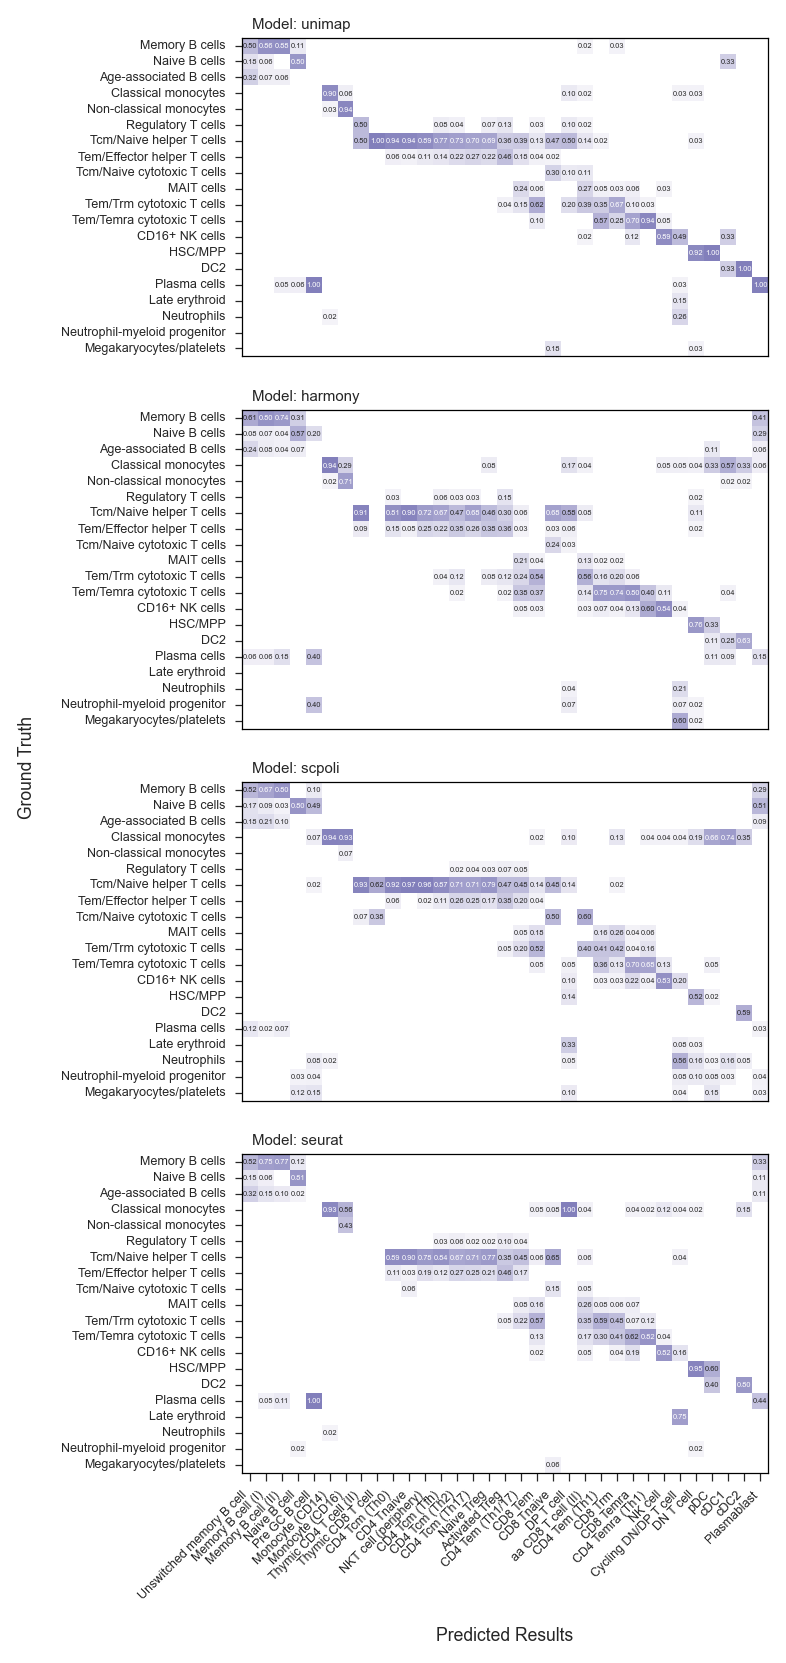

In [5]:
fig, axs = plt.subplots(figsize=(185 / 25.4, 250 / 25.4))
axs.remove()

for idx, model in enumerate(models):
    result = UnimapResult('mg', f'{model}/2023', root_dir='../../results', detailed=False)

    cm = result.get_cm(percentage_direction=1, ct_labels=ct_order, pd_ct_labels=pd_ct_order)
    ax = sns.heatmap(cm, annot=True, cmap=custom_cmap, annot_kws={'size': 3}, fmt='.2f', cbar=False, square=True, mask=cm < 0.02, ax=fig.add_axes(positions[idx]), xticklabels=pd_ct_order, yticklabels=ct_order)
    result.remove_spines(ax, sp_v=True, remove_legend=False)
    ax.text(0.02, 1.04, f'Model: {model}', ha='left', va='center', transform=ax.transAxes, fontdict={'fontsize': 6})
    ax.set_yticklabels(ct_order, rotation=0, fontsize=5)
    ax.tick_params(bottom=False, top=False, left=True, right=False, length=3, width=0.5)
    if idx == 3:
        ax.set_xticklabels(pd_ct_order, rotation=45, ha='right', fontsize=5)
        ax.tick_params(bottom=True, top=False, left=True, right=False, length=3, width=0.5)
        ax.set_xlabel('Predicted Results', fontsize=7, labelpad=10)
    else:
        ax.set_xticklabels([])

    if idx == 1:
        ylabel = ax.set_ylabel('Ground Truth', fontsize=7, labelpad=10)
        ylabel.set_position((0, -0.12))
# fig.savefig('../figs/supplementary fig10a.pdf', dpi=720)
# fig.savefig('../sup_figs/sup10a.png', dpi=720)

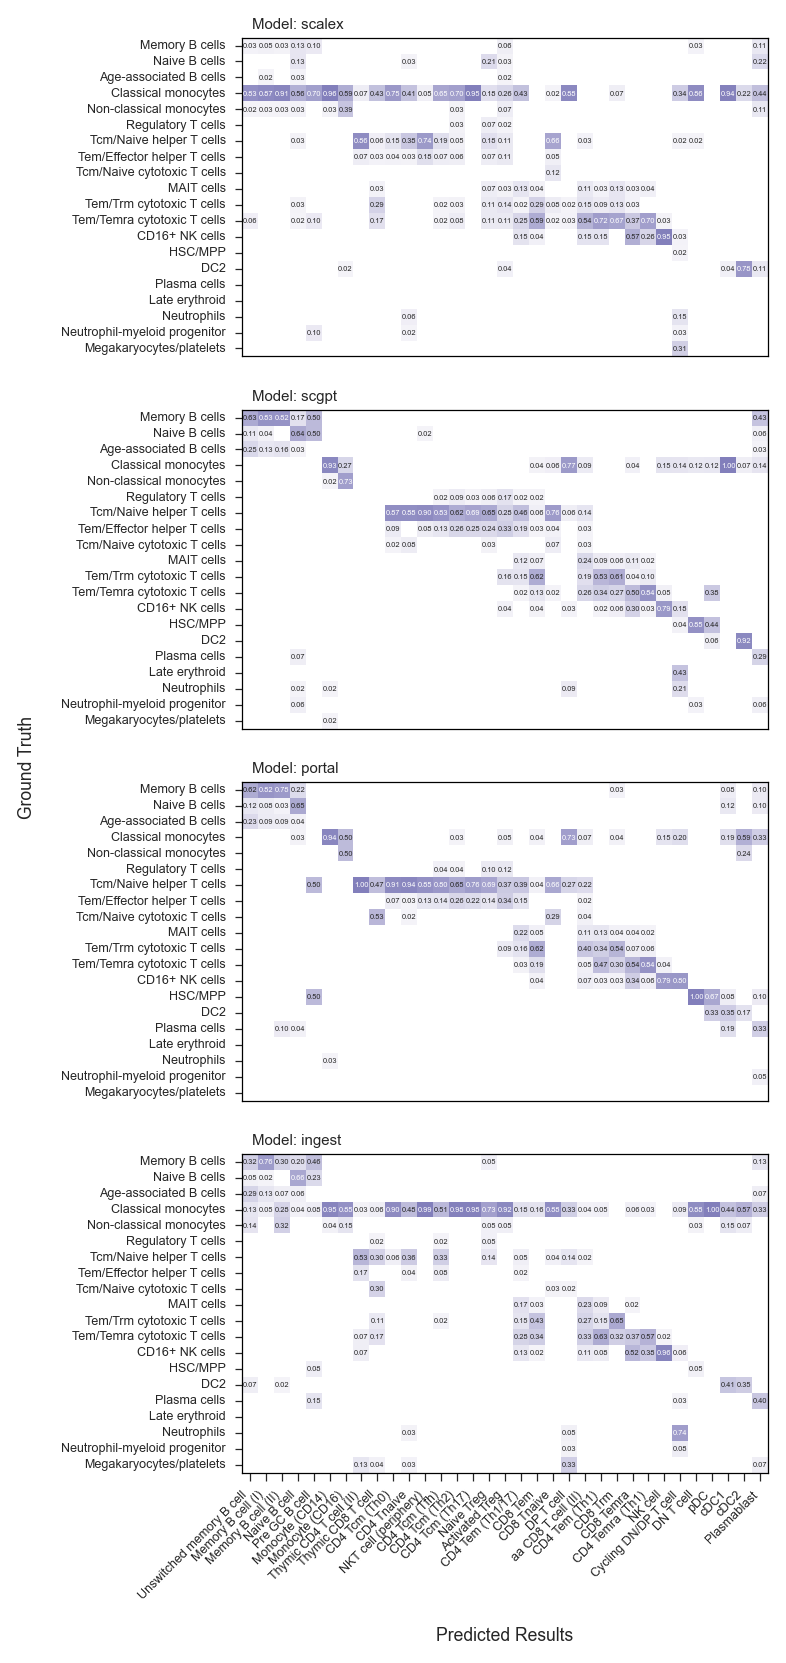

In [6]:
fig, axs = plt.subplots(figsize=(185 / 25.4, 250 / 25.4))
axs.remove()

for idx, model in enumerate(models2):
    result = UnimapResult('mg', f'{model}/2023', root_dir='../../results', detailed=False)

    cm = result.get_cm(percentage_direction=1, ct_labels=ct_order, pd_ct_labels=pd_ct_order)
    ax = sns.heatmap(cm, annot=True, cmap=custom_cmap, annot_kws={'size': 3}, fmt='.2f', cbar=False, square=True, mask=cm < 0.02, ax=fig.add_axes(positions[idx]), xticklabels=pd_ct_order, yticklabels=ct_order)
    result.remove_spines(ax, sp_v=True, remove_legend=False)
    ax.text(0.02, 1.04, f'Model: {model}', ha='left', va='center', transform=ax.transAxes, fontdict={'fontsize': 6})
    ax.set_yticklabels(ct_order, rotation=0, fontsize=5)
    ax.tick_params(bottom=False, top=False, left=True, right=False, length=3, width=0.5)
    if idx == 3:
        ax.set_xticklabels(pd_ct_order, rotation=45, ha='right', fontsize=5)
        ax.tick_params(bottom=True, top=False, left=True, right=False, length=3, width=0.5)
        ax.set_xlabel('Predicted Results', fontsize=7, labelpad=10)
    else:
        ax.set_xticklabels([])

    if idx == 1:
        ylabel = ax.set_ylabel('Ground Truth', fontsize=7, labelpad=10)
        ylabel.set_position((0, -0.12))
# fig.savefig('../figs/supplementary fig10b.pdf', dpi=720)
# fig.savefig('../sup_figs/sup10b.png', dpi=720)

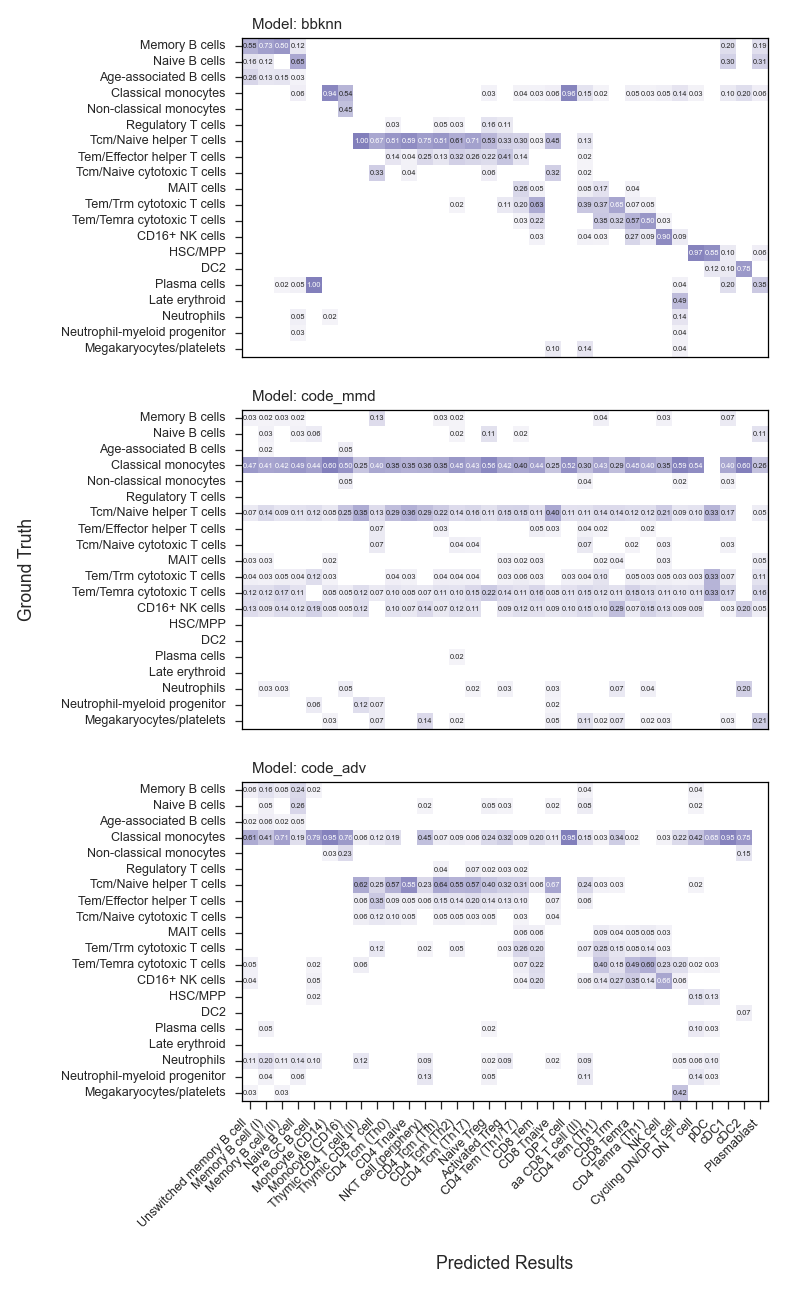

In [7]:
fig, axs = plt.subplots(figsize=(185 / 25.4, 250 / 25.4))
axs.remove()

for idx, model in enumerate(models3):
    result = UnimapResult('mg', f'{model}/2023', root_dir='../../results', detailed=False)

    cm = result.get_cm(percentage_direction=1, ct_labels=ct_order, pd_ct_labels=pd_ct_order)
    ax = sns.heatmap(cm, annot=True, cmap=custom_cmap, annot_kws={'size': 3}, fmt='.2f', cbar=False, square=True, mask=cm < 0.02, ax=fig.add_axes(positions[idx]), xticklabels=pd_ct_order, yticklabels=ct_order)
    result.remove_spines(ax, sp_v=True, remove_legend=False)
    ax.text(0.02, 1.04, f'Model: {model}', ha='left', va='center', transform=ax.transAxes, fontdict={'fontsize': 6})
    ax.set_yticklabels(ct_order, rotation=0, fontsize=5)
    ax.tick_params(bottom=False, top=False, left=True, right=False, length=3, width=0.5)
    if idx == 2:
        ax.set_xticklabels(pd_ct_order, rotation=45, ha='right', fontsize=5)
        ax.tick_params(bottom=True, top=False, left=True, right=False, length=3, width=0.5)
        ax.set_xlabel('Predicted Results', fontsize=7, labelpad=10)
    else:
        ax.set_xticklabels([])

    if idx == 1:
        ylabel = ax.set_ylabel('Ground Truth', fontsize=7, labelpad=10)
        # ylabel.set_position((0, -0.12))
# fig.savefig('../figs/supplementary fig10c.pdf', dpi=720)
# fig.savefig('../sup_figs/sup10c.png', dpi=720)